# 1. Background Information

# 2. Explanatory Data Analysis

In [62]:
# Import packages
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
# Load data
sleep = pd.read_excel("2015SleepinAmericaPollSleepandPainRawDataExcel.xlsx")

## 2.1 Data Cleaning & Variable Construction

In [3]:
# Filter out observations without data for key variables of interets: time in bed and actual sleep data
sleep = sleep.loc[~(sleep.DOV_WEEKTIME.isna() | sleep.DOV_WEEKEND.isna() | sleep.DOV_TOTALWEEK.isna() | sleep.DOV_TOTALWEEKEND.isna())]

In [4]:
# Variable Construction

# average hours in bed per day
sleep['avg_bed'] = (sleep.DOV_WEEKTIME/ 60 * 5 + sleep.DOV_WEEKEND / 60 * 2)/ 7
# average actual sleep per day
sleep['avg_actual_sleep'] = (sleep.DOV_TOTALWEEK/ 60 * 5 + sleep.DOV_TOTALWEEKEND / 60 * 2)/ 7
 
# Define sleep efficiency as average actual sleep per day/average sleep hours per day
sleep['sleep_efficiency'] = sleep.avg_actual_sleep/sleep.avg_bed
sleep.loc[sleep.sleep_efficiency > 1, 'sleep_efficiency'] = 1

# Whether the person go to bed before or after mid-night on weekdays
sleep['before_mnt_week'] = 'Before Mid-night'
sleep.before_mnt_week.loc[sleep.Q2_ampmA == 1] = 'After Mid-night'
# Whether the person go to bed before or after mid-night on weekends
sleep['before_mnt_weekend'] = 'Before Mid-night'
sleep.before_mnt_weekend.loc[sleep.Q3_ampmA == 1] = 'After Mid-night'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
# Reverse Coding
def reverse_code(col):
    return col.max() - col + 1

# Motivation to make sure you have enough time to sleep
sleep['Q16_rev'] = reverse_code(sleep.Q16)

# Importance of going to bed at a suitable time
sleep['Q17_rev'] = reverse_code(sleep.Q17)

# Sleep Disorders
sleep['Q22_rev'] = sleep.Q22
sleep.loc[sleep.Q22 == 2, 'Q22_rev'] = 0

## 2.2 Individual Variables 

### 2.2.1 Sleep Quality

Text(0.5, 0, 'Sleep Quality')

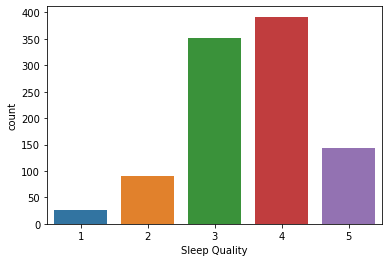

In [6]:
sns.countplot(x="Q10_a", data=sleep)
plt.xlabel('Sleep Quality')

### 2.2.1 Sleep Efficiency

Text(0.5, 0, 'Sleep Efficiency')

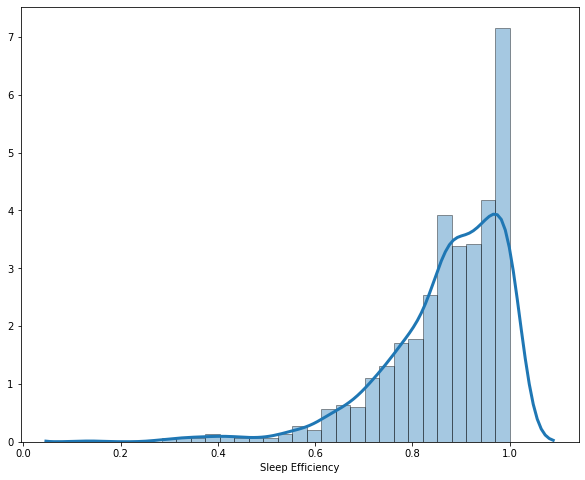

In [7]:
fig = plt.figure(figsize = [10,8])
sns.distplot(sleep.sleep_efficiency, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('Sleep Efficiency')

## 2.3 Relationship between Variables

### 2.3.1 Sleep Efficiency & Sleep Quality

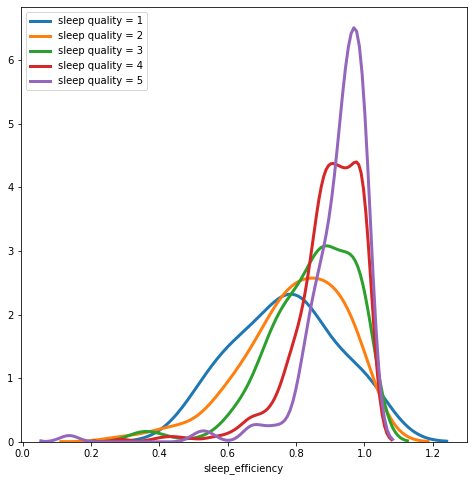

In [8]:
fig = plt.figure(figsize = [8,8])

for i in range(1,6): 
    sns.distplot(sleep.sleep_efficiency.loc[sleep.Q10_a == i], label = 'sleep quality = ' + str(i), hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.legend()

### 2.3.2 Time Go to Bed & Sleep Efficiency

Text(0.5, 0, 'Sleep Efficiency')

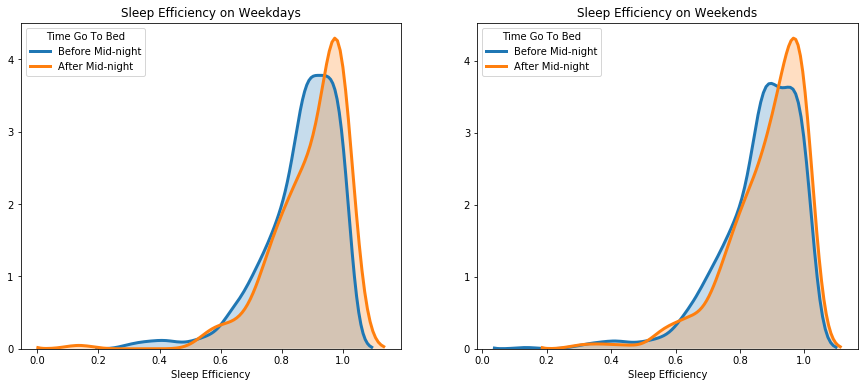

In [9]:
fig = plt.figure(figsize = [15,6])

# Weekdays
ax = fig.add_subplot(121)
sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

plt.title('Sleep Efficiency on Weekdays')
plt.legend(loc = 'upper left', title = 'Time Go To Bed')
plt.xlabel('Sleep Efficiency')

# Weekends
ax = fig.add_subplot(122)
sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)
plt.title('Sleep Efficiency on Weekends')
plt.legend(loc = 'upper left',title = 'Time Go To Bed')
plt.xlabel('Sleep Efficiency')

### 2.3.3 Time Go to Bed & Sleep Quality

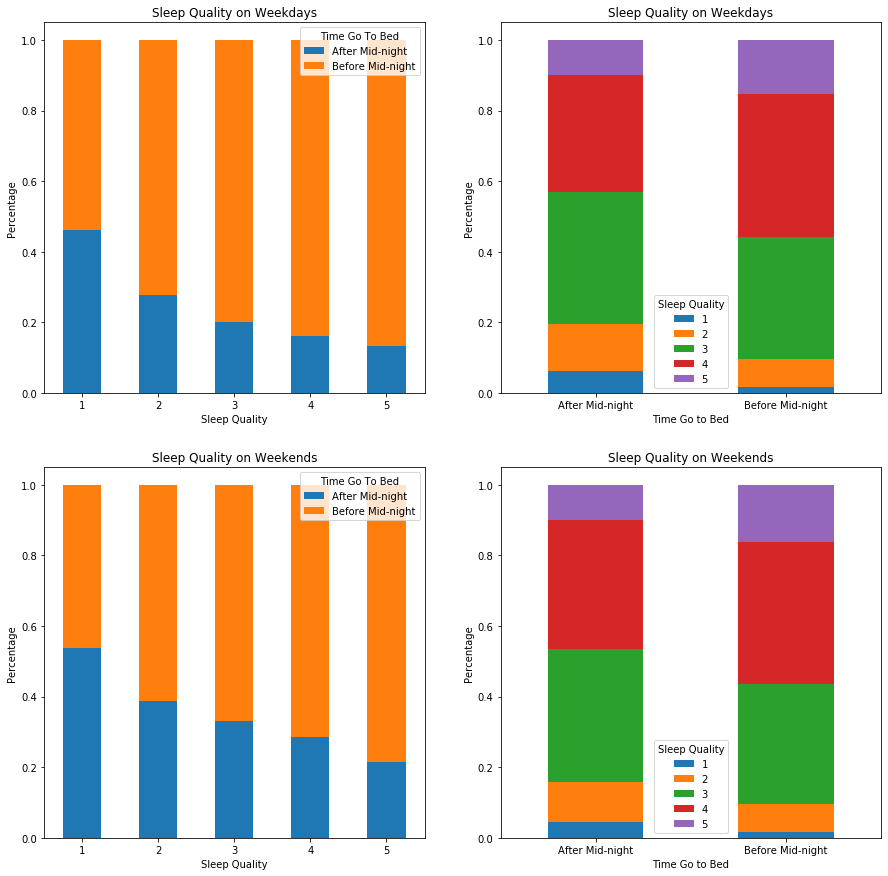

In [10]:
fig = plt.figure(figsize = [15,15])

# Weekdays
ax = fig.add_subplot(221)
bar_data_week = sleep.groupby('Q10_a').before_mnt_week.value_counts(normalize=True).unstack()
bar_data_week.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekends
ax = fig.add_subplot(223)
bar_data_weekend = sleep.groupby('Q10_a').before_mnt_weekend.value_counts(normalize=True).unstack()
bar_data_weekend.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekdays
ax = fig.add_subplot(222)
bar_data_week2 = sleep.groupby('before_mnt_week').Q10_a.value_counts(normalize=True).unstack()
bar_data_week2.plot(rot=0, kind = 'bar', title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')


# Weekends
ax = fig.add_subplot(224)
bar_data_weekend2 = sleep.groupby('before_mnt_weekend').Q10_a.value_counts(normalize=True).unstack()

bar_data_weekend2.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')

plt.show()

### 2.3.4 Sleep Disorders & Sleep Quality

Text(0.5, 0, 'Sleep Disorder')

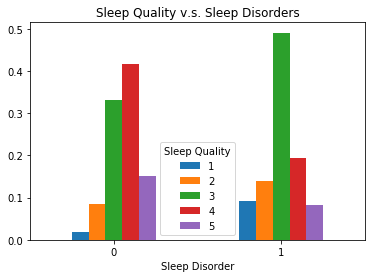

In [11]:
bar_data_disorder = sleep.loc[sleep.Q22_rev != -1].groupby('Q22_rev').Q10_a.value_counts(normalize=True).unstack()

bar_data_disorder.plot(rot=0, kind = 'bar',title = 'Sleep Quality v.s. Sleep Disorders')
plt.legend(title = 'Sleep Quality')
plt.xlabel('Sleep Disorder')

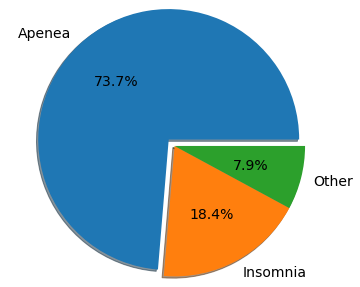

In [12]:
labels = 'Apenea', 'Insomnia', 'Other'
sizes = [sleep['Q23_a'].value_counts()[1], sleep['Q23_b'].value_counts()[1],sleep['Q23_c'].value_counts()[1]]

plt.axis('equal')
plt.pie(sizes, labels=labels, radius=1.5,autopct='%0.1f%%',shadow=True,explode=[0.1,0,0], textprops = {'fontsize': 14})
plt.show()

### 2.3.5 Other Factors Correlated with Sleep Quality

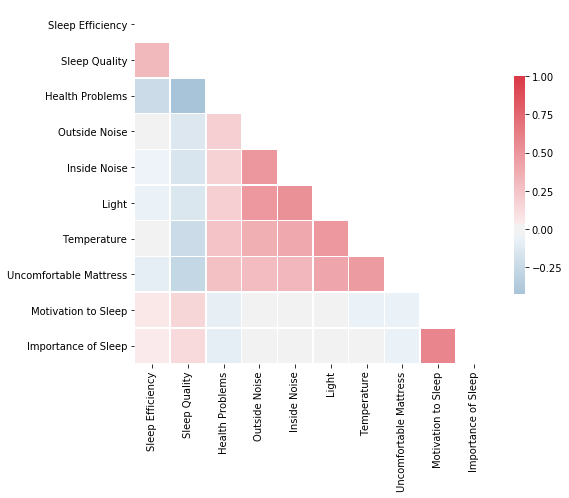

In [13]:
corr_data = sleep.loc[:, ['sleep_efficiency', 'Q10_a','Q14a','Q15_a', 'Q15_b', 'Q15_c', 'Q15_d', 'Q15_e','Q16_rev', 'Q17_rev']]
corr_data.columns = ['Sleep Efficiency', 'Sleep Quality', 'Health Problems', 'Outside Noise', 'Inside Noise', 'Light','Temperature', 'Uncomfortable Mattress', 'Motivation to Sleep', 'Importance of Sleep']

corr = corr_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
figure, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(600, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center=0,
            square = True, linewidths = .5, cbar_kws={"shrink": .5})

In [14]:
# Number of people with sleeping efficiency < 0.8
sleep.loc[sleep.sleep_efficiency < 0.8].shape

(232, 199)

(1029, 192)

(1022, 2)

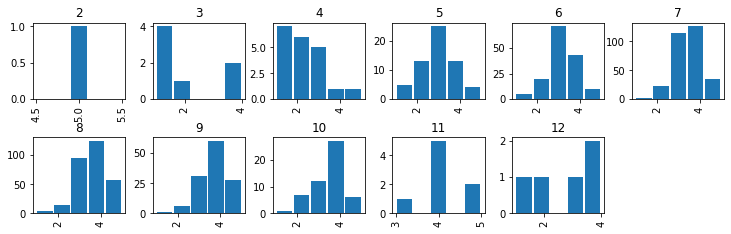

In [73]:
import math
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]
sleep.shape
new_sleep = sleep.loc[sleep.Q6_HoursB>=0,['qua','Q6_HoursB']]
new_sleep.shape
b=new_sleep.hist(column='qua',bins=5,rwidth=0.9,figsize=(12,12),layout=(6,6),by=new_sleep.Q6_HoursB,)





##  Regression for Sleep Quality and Bedtime